# Cross-Docking Terminal: Exploratory Data Analysis

This notebook explores the 60 simulation instances across 6 traffic levels to understand:
- Traffic patterns and arrival distributions
- Pallet flows by destination and type
- Due date characteristics
- Resource requirements and bottlenecks
- Statistical summaries for all scenarios

In [13]:
# Import required libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from src.data_loader import DataLoader, load_config

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Initialize data loader
loader = DataLoader(dataset_root="../data")
config = load_config('../config/parameters.yaml')

print("Environment setup complete!")

INFO:src.data_loader:DataLoader initialized with root: ../data
INFO:src.data_loader:Loaded configuration from ../config/parameters.yaml


Environment setup complete!


## 1. Load All Instances

Load all 60 instances across the 6 traffic level scenarios.

In [14]:
# Load all scenarios
print("Loading all instances... (this may take a minute)\n")
all_data = loader.load_all_scenarios()

# Summary
print("\nDATASET SUMMARY")
for scenario, instances in all_data.items():
    print(f"{scenario}: {len(instances)} instances loaded")

total_instances = sum(len(instances) for instances in all_data.values())
print(f"\nTotal instances loaded: {total_instances}")

INFO:src.data_loader:Loading instance: HH_168h/instance1


Loading all instances... (this may take a minute)



INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance1': 1009 inbound, 1013 outbound, 26234 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance2
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance2': 1001 inbound, 1011 outbound, 26026 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance3
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance3': 1016 inbound, 1020 outbound, 26416 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance4
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance4': 1001 inbound, 1012 outbound, 26026 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance5
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance5': 1011 inbound, 1015 outbound, 26286 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance6
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance6': 1011 inbo


DATASET SUMMARY
HH_168h: 10 instances loaded
MH_168h: 10 instances loaded
MM_168h: 10 instances loaded
LH_168h: 10 instances loaded
LM_168h: 10 instances loaded
LL_168h: 10 instances loaded

Total instances loaded: 60


## 2. Create Comprehensive Instance Summary

Generate a table with key statistics for all instances.

In [15]:
# Get summary statistics for all instances
summary_df = loader.get_instance_summary()

print("\nINSTANCE SUMMARY (first 10 rows)")
print(summary_df.head(10))

# Save to CSV
output_path = Path('../results/tables/instance_summary.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)
summary_df.to_csv(output_path, index=False)
print(f"\nSummary saved to: {output_path}")

INFO:src.data_loader:Loading instance: HH_168h/instance1
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance1': 1009 inbound, 1013 outbound, 26234 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance2
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance2': 1001 inbound, 1011 outbound, 26026 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance3
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance3': 1016 inbound, 1020 outbound, 26416 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance4
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance4': 1001 inbound, 1012 outbound, 26026 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance5
INFO:src.data_loader:Successfully loaded: CrossDockInstance('HH_168h/instance5': 1011 inbound, 1015 outbound, 26286 pallets)
INFO:src.data_loader:Loading instance: HH_168h/instance6
INFO:src.data_loader:Successfully


INSTANCE SUMMARY (first 10 rows)
        instance_name  num_inbound_trucks  num_outbound_trucks  num_pallets  \
0   HH_168h/instance1                1009                 1013        26234   
1   HH_168h/instance2                1001                 1011        26026   
2   HH_168h/instance3                1016                 1020        26416   
3   HH_168h/instance4                1001                 1012        26026   
4   HH_168h/instance5                1011                 1015        26286   
5   HH_168h/instance6                1011                 1007        26286   
6   HH_168h/instance7                1009                 1015        26234   
7   HH_168h/instance8                1005                 1010        26130   
8   HH_168h/instance9                1009                 1011        26234   
9  HH_168h/instance10                1009                  999        26234   

        pallets_by_destination                    pallets_by_type  \
0  {3: 8765, 2: 8763, 1: 87

## 3. Traffic Level Comparison

Compare average characteristics across different traffic levels.

In [16]:
# Extract scenario from instance name
summary_df['scenario'] = summary_df['instance_name'].str.split('/').str[0]

# Group by scenario
scenario_stats = summary_df.groupby('scenario').agg({
    'num_inbound_trucks': ['mean', 'std'],
    'num_outbound_trucks': ['mean', 'std'],
    'num_pallets': ['mean', 'std'],
    'avg_pallet_due_date': 'mean',
    'avg_outbound_due_date': 'mean',
    'simulation_horizon': 'mean'
}).round(2)

print("\nAVERAGE STATISTICS BY SCENARIO")
print(scenario_stats)

# Save to CSV
scenario_stats.to_csv('../results/tables/scenario_comparison.csv')
print("\nScenario comparison saved to: ../results/tables/scenario_comparison.csv")


AVERAGE STATISTICS BY SCENARIO
         num_inbound_trucks       num_outbound_trucks       num_pallets  \
                       mean   std                mean   std        mean   
scenario                                                                  
HH_168h              1008.1  4.63              1011.3  5.56     26210.6   
LH_168h               252.2  0.63              1011.3  5.56      6557.2   
LL_168h               252.2  0.63               252.2  0.42      6557.2   
LM_168h               252.2  0.63               504.9  1.73      6557.2   
MH_168h               504.7  1.42              1011.3  5.56     13122.2   
MM_168h               504.7  1.42               504.9  1.73     13122.2   

                 avg_pallet_due_date avg_outbound_due_date simulation_horizon  
             std                mean                  mean               mean  
scenario                                                                       
HH_168h   120.37             5786.81               5

## 4. Visualizations: Traffic Patterns

### 4.1 Number of Trucks by Scenario

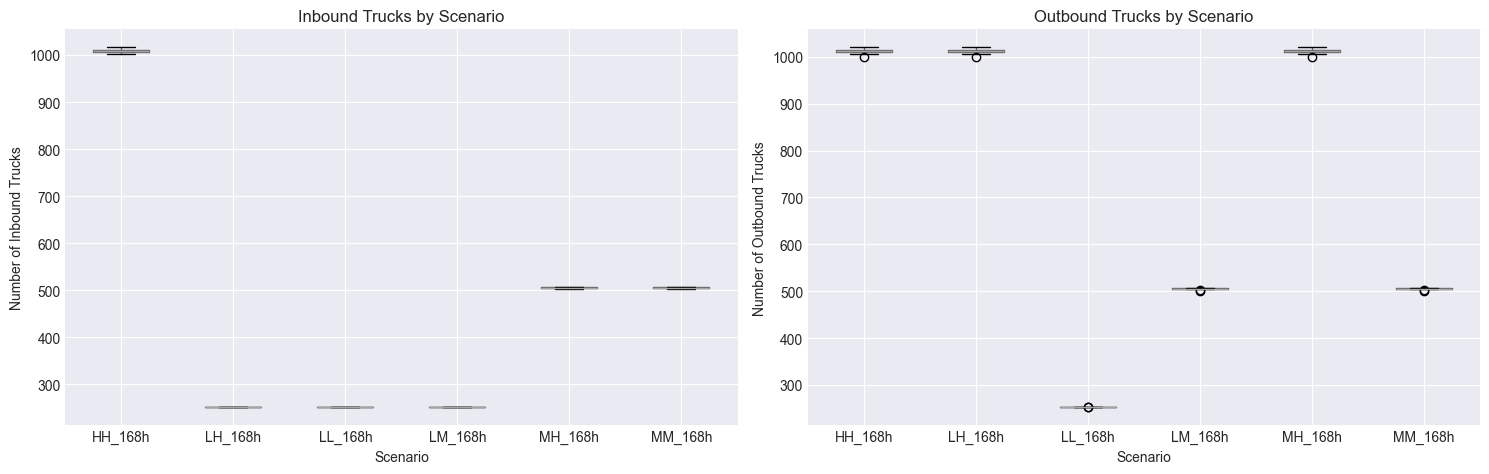

Figure saved to: ../results/figures/trucks_by_scenario.png


In [17]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Inbound trucks
summary_df.boxplot(column='num_inbound_trucks', by='scenario', ax=axes[0])
axes[0].set_title('Inbound Trucks by Scenario')
axes[0].set_xlabel('Scenario')
axes[0].set_ylabel('Number of Inbound Trucks')
axes[0].get_figure().suptitle('')  # Remove default title

# Plot 2: Outbound trucks
summary_df.boxplot(column='num_outbound_trucks', by='scenario', ax=axes[1])
axes[1].set_title('Outbound Trucks by Scenario')
axes[1].set_xlabel('Scenario')
axes[1].set_ylabel('Number of Outbound Trucks')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('../results/figures/trucks_by_scenario.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: ../results/figures/trucks_by_scenario.png")

### 4.2 Number of Pallets by Scenario

<Figure size 1200x600 with 0 Axes>

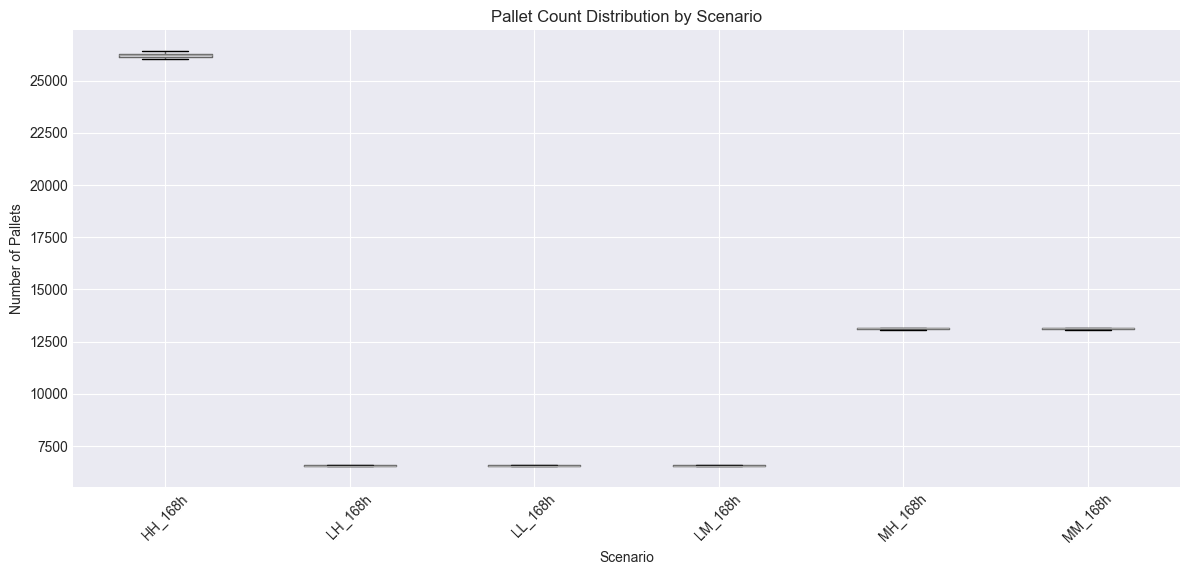

Figure saved to: ../results/figures/pallets_by_scenario.png


In [18]:
# Pallet counts by scenario
plt.figure(figsize=(12, 6))
summary_df.boxplot(column='num_pallets', by='scenario')
plt.title('Pallet Count Distribution by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Number of Pallets')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../results/figures/pallets_by_scenario.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: ../results/figures/pallets_by_scenario.png")

## 5. Deep Dive: One Instance Analysis

Detailed analysis of a single instance (MM_168h/instance1) to understand data structure.

In [20]:
# Load one instance for detailed analysis
instance = loader.load_instance('MM_168h', 1)

print(f"\nDETAILED ANALYSIS: {instance.instance_name}")
print(f"\nBasic Info:")
print(f"  Inbound trucks: {len(instance.inbound_trucks)}")
print(f"  Outbound trucks: {len(instance.outbound_trucks)}")
print(f"  Pallets: {len(instance.pallets)}")

# Convert to DataFrames for analysis
inbound_df = pd.DataFrame([
    {'truck_id': t.truck_id, 'arrival_time': t.arrival_time}
    for t in instance.inbound_trucks
])

outbound_df = pd.DataFrame([
    {'truck_id': t.truck_id, 'arrival_time': t.arrival_time, 
     'due_date': t.due_date, 'destination': t.destination}
    for t in instance.outbound_trucks
])

pallet_df = pd.DataFrame([
    {'pallet_id': p.pallet_id, 'due_date': p.due_date,
     'destination': p.destination, 'type': p.pallet_type,
     'inbound_truck': p.inbound_truck_id}
    for p in instance.pallets
])

print(f"\nPallet Distribution:")
print(f"  By Destination: {pallet_df['destination'].value_counts().to_dict()}")
print(f"  By Type: {pallet_df['type'].value_counts().to_dict()}")
print(f"\nOutbound Truck Distribution:")
print(f"  By Destination: {outbound_df['destination'].value_counts().to_dict()}")

INFO:src.data_loader:Loading instance: MM_168h/instance1
INFO:src.data_loader:Successfully loaded: CrossDockInstance('MM_168h/instance1': 506 inbound, 505 outbound, 13156 pallets)



DETAILED ANALYSIS: MM_168h/instance1

Basic Info:
  Inbound trucks: 506
  Outbound trucks: 505
  Pallets: 13156

Pallet Distribution:
  By Destination: {2: 4450, 1: 4366, 3: 4340}
  By Type: {'A': 4458, 'B': 4398, 'C': 4300}

Outbound Truck Distribution:
  By Destination: {1: 169, 2: 168, 3: 168}


### 5.1 Arrival Time Distributions

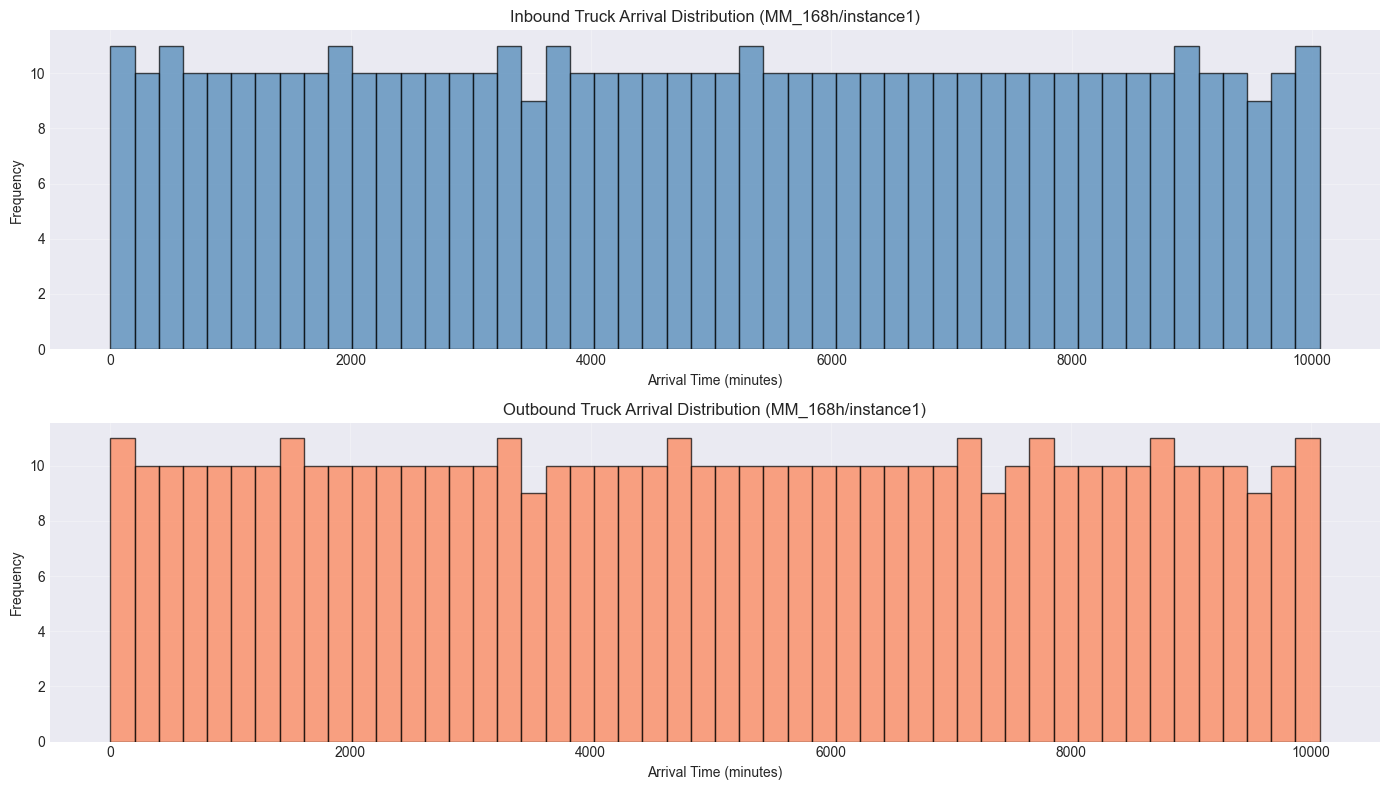

Figure saved to: ../results/figures/arrival_distributions_MM_instance1.png


In [21]:
# Plot arrival time distributions
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Inbound truck arrivals
axes[0].hist(inbound_df['arrival_time'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_title('Inbound Truck Arrival Distribution (MM_168h/instance1)')
axes[0].set_xlabel('Arrival Time (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Outbound truck arrivals
axes[1].hist(outbound_df['arrival_time'], bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[1].set_title('Outbound Truck Arrival Distribution (MM_168h/instance1)')
axes[1].set_xlabel('Arrival Time (minutes)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/arrival_distributions_MM_instance1.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: ../results/figures/arrival_distributions_MM_instance1.png")

### 5.2 Due Date Analysis

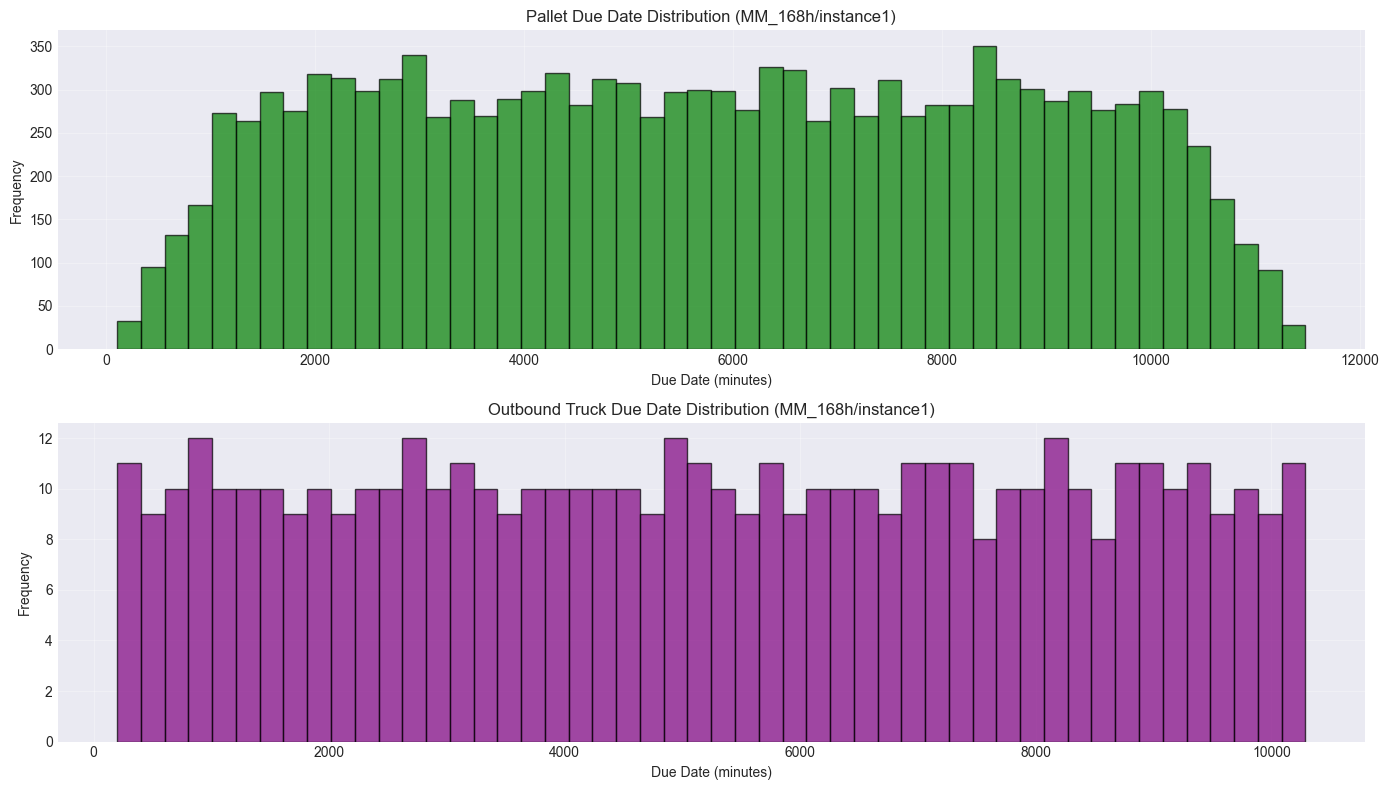

Figure saved to: ../results/figures/due_date_distributions_MM_instance1.png


In [22]:
# Plot due date distributions
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Pallet due dates
axes[0].hist(pallet_df['due_date'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0].set_title('Pallet Due Date Distribution (MM_168h/instance1)')
axes[0].set_xlabel('Due Date (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Outbound truck due dates
axes[1].hist(outbound_df['due_date'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1].set_title('Outbound Truck Due Date Distribution (MM_168h/instance1)')
axes[1].set_xlabel('Due Date (minutes)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/due_date_distributions_MM_instance1.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: ../results/figures/due_date_distributions_MM_instance1.png")

### 5.3 Pallet Flow by Destination and Type

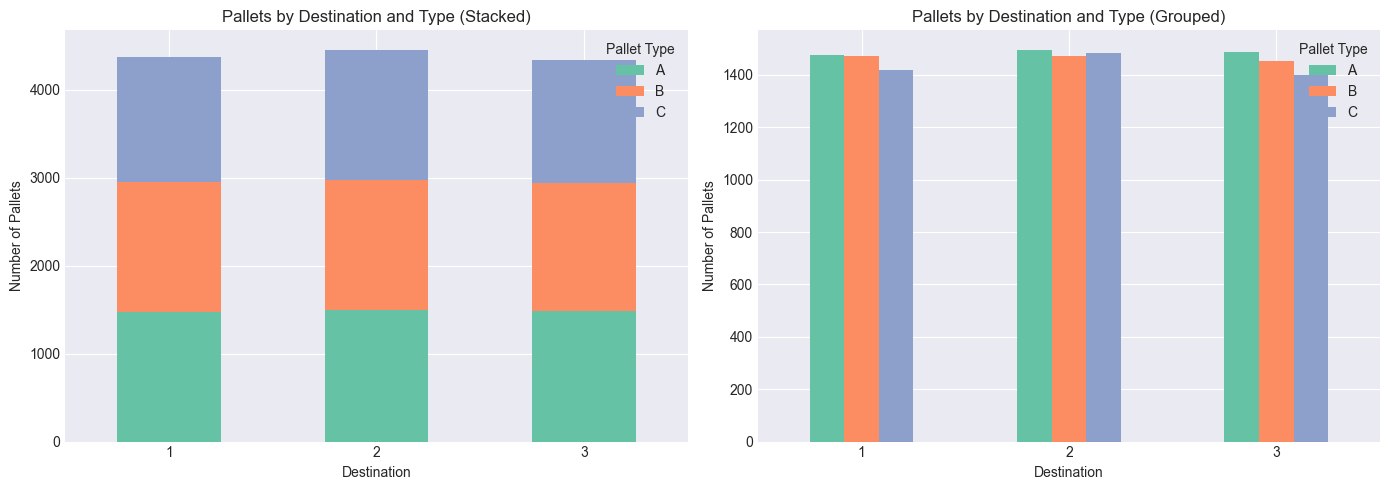


Cross-tabulation:
type            A     B     C
destination                  
1            1477  1472  1417
2            1495  1472  1483
3            1486  1454  1400

Figure saved to: ../results/figures/pallet_flow_analysis_MM_instance1.png


In [23]:
# Create cross-tabulation
pallet_crosstab = pd.crosstab(pallet_df['destination'], pallet_df['type'])

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
pallet_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=['#66c2a5', '#fc8d62', '#8da0cb'])
axes[0].set_title('Pallets by Destination and Type (Stacked)')
axes[0].set_xlabel('Destination')
axes[0].set_ylabel('Number of Pallets')
axes[0].legend(title='Pallet Type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Grouped bar chart
pallet_crosstab.plot(kind='bar', ax=axes[1], color=['#66c2a5', '#fc8d62', '#8da0cb'])
axes[1].set_title('Pallets by Destination and Type (Grouped)')
axes[1].set_xlabel('Destination')
axes[1].set_ylabel('Number of Pallets')
axes[1].legend(title='Pallet Type')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('../results/figures/pallet_flow_analysis_MM_instance1.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCross-tabulation:")
print(pallet_crosstab)
print("\nFigure saved to: ../results/figures/pallet_flow_analysis_MM_instance1.png")

### 5.4 Time Window Analysis (Slack Time)

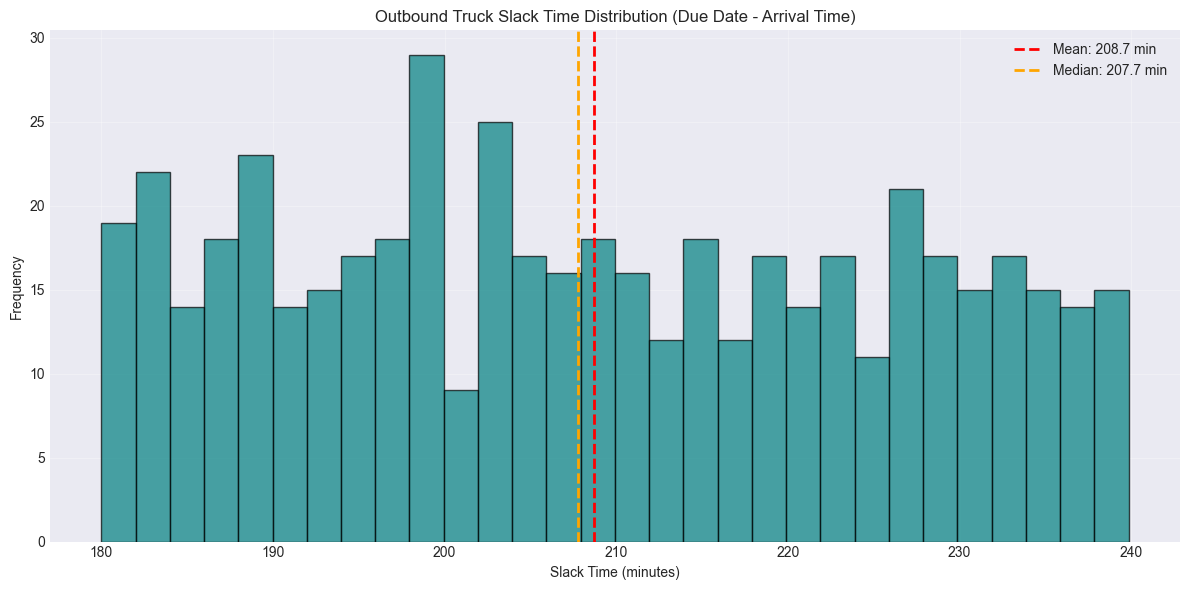


Slack Time Statistics:
  Mean: 208.70 minutes
  Median: 207.74 minutes
  Std Dev: 17.30 minutes
  Min: 180.01 minutes
  Max: 239.84 minutes


In [24]:
# Calculate slack time (due_date - arrival_time) for outbound trucks
outbound_df['slack_time'] = outbound_df['due_date'] - outbound_df['arrival_time']

# Visualize slack time distribution
plt.figure(figsize=(12, 6))
plt.hist(outbound_df['slack_time'], bins=30, alpha=0.7, color='teal', edgecolor='black')
plt.axvline(outbound_df['slack_time'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f"Mean: {outbound_df['slack_time'].mean():.1f} min")
plt.axvline(outbound_df['slack_time'].median(), color='orange', linestyle='--', 
            linewidth=2, label=f"Median: {outbound_df['slack_time'].median():.1f} min")
plt.title('Outbound Truck Slack Time Distribution (Due Date - Arrival Time)')
plt.xlabel('Slack Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/slack_time_distribution_MM_instance1.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nSlack Time Statistics:")
print(f"  Mean: {outbound_df['slack_time'].mean():.2f} minutes")
print(f"  Median: {outbound_df['slack_time'].median():.2f} minutes")
print(f"  Std Dev: {outbound_df['slack_time'].std():.2f} minutes")
print(f"  Min: {outbound_df['slack_time'].min():.2f} minutes")
print(f"  Max: {outbound_df['slack_time'].max():.2f} minutes")

## 6. Resource Requirement Analysis

Estimate peak resource utilization across all scenarios.


PEAK INBOUND ARRIVAL RATES (per hour window)
          mean  max
scenario           
HH_168h    7.0    7
LH_168h    2.0    2
LL_168h    2.0    2
LM_168h    2.0    2
MH_168h    4.0    4
MM_168h    4.0    4


<Figure size 1200x600 with 0 Axes>

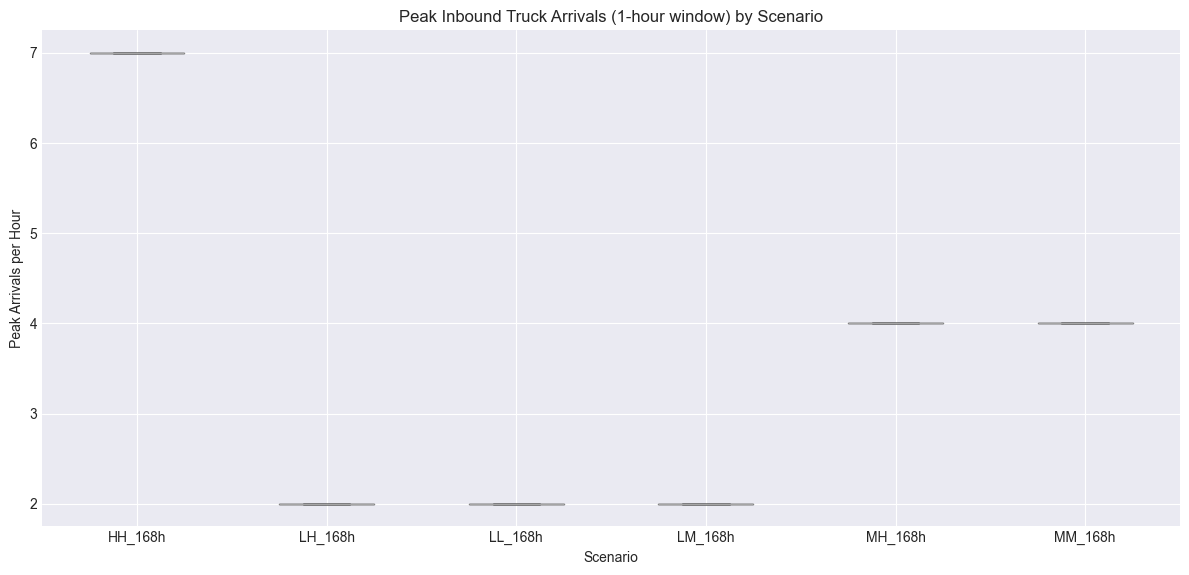

Figure saved to: ../results/figures/peak_arrivals_by_scenario.png


In [25]:
# Function to calculate peak arrival rates
def calculate_peak_arrivals(instance, window_hours=1):
    """Calculate peak arrival rates in a sliding time window."""
    window_minutes = window_hours * 60
    
    # Get all inbound arrivals
    arrivals = sorted([t.arrival_time for t in instance.inbound_trucks])
    max_time = max(arrivals)
    
    # Sliding window to find peak
    max_count = 0
    for start_time in range(0, int(max_time), 30):  # Check every 30 minutes
        end_time = start_time + window_minutes
        count = sum(1 for a in arrivals if start_time <= a < end_time)
        max_count = max(max_count, count)
    
    return max_count

# Calculate for each scenario
resource_analysis = []
for scenario, instances in all_data.items():
    for instance in instances:
        peak_1h = calculate_peak_arrivals(instance, window_hours=1)
        resource_analysis.append({
            'scenario': scenario,
            'instance': instance.instance_name,
            'peak_arrivals_1h': peak_1h,
            'num_pallets': len(instance.pallets),
            'num_outbound_trucks': len(instance.outbound_trucks)
        })

resource_df = pd.DataFrame(resource_analysis)

# Group by scenario
peak_by_scenario = resource_df.groupby('scenario')['peak_arrivals_1h'].agg(['mean', 'max']).round(1)

print("\nPEAK INBOUND ARRIVAL RATES (per hour window)")
print(peak_by_scenario)

# Visualize
plt.figure(figsize=(12, 6))
resource_df.boxplot(column='peak_arrivals_1h', by='scenario')
plt.title('Peak Inbound Truck Arrivals (1-hour window) by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Peak Arrivals per Hour')
plt.suptitle('')

plt.tight_layout()
plt.savefig('../results/figures/peak_arrivals_by_scenario.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: ../results/figures/peak_arrivals_by_scenario.png")

## 7. Summary Statistics Export

Generate comprehensive summary tables for all instances.

In [26]:
# Create detailed statistics table
detailed_stats = []

for scenario, instances in all_data.items():
    for instance in instances:
        # Convert pallets to DataFrame
        pallet_df_temp = pd.DataFrame([
            {'due_date': p.due_date, 'destination': p.destination, 'type': p.pallet_type}
            for p in instance.pallets
        ])
        
        outbound_df_temp = pd.DataFrame([
            {'arrival': t.arrival_time, 'due_date': t.due_date, 'destination': t.destination}
            for t in instance.outbound_trucks
        ])
        
        stats = {
            'scenario': scenario,
            'instance': instance.instance_name,
            'num_inbound': len(instance.inbound_trucks),
            'num_outbound': len(instance.outbound_trucks),
            'num_pallets': len(instance.pallets),
            'pallets_dest1': (pallet_df_temp['destination'] == 1).sum(),
            'pallets_dest2': (pallet_df_temp['destination'] == 2).sum(),
            'pallets_dest3': (pallet_df_temp['destination'] == 3).sum(),
            'pallets_typeA': (pallet_df_temp['type'] == 'A').sum(),
            'pallets_typeB': (pallet_df_temp['type'] == 'B').sum(),
            'pallets_typeC': (pallet_df_temp['type'] == 'C').sum(),
            'avg_pallet_due_date': pallet_df_temp['due_date'].mean(),
            'avg_truck_slack': (outbound_df_temp['due_date'] - outbound_df_temp['arrival']).mean(),
        }
        detailed_stats.append(stats)

detailed_df = pd.DataFrame(detailed_stats)

# Save to CSV
detailed_df.to_csv('../results/tables/detailed_instance_statistics.csv', index=False)
print("\nDetailed statistics saved to: ../results/tables/detailed_instance_statistics.csv")
print(f"\nFirst 5 rows:")
print(detailed_df.head())


Detailed statistics saved to: ../results/tables/detailed_instance_statistics.csv

First 5 rows:
  scenario           instance  num_inbound  num_outbound  num_pallets  \
0  HH_168h  HH_168h/instance1         1009          1013        26234   
1  HH_168h  HH_168h/instance2         1001          1011        26026   
2  HH_168h  HH_168h/instance3         1016          1020        26416   
3  HH_168h  HH_168h/instance4         1001          1012        26026   
4  HH_168h  HH_168h/instance5         1011          1015        26286   

   pallets_dest1  pallets_dest2  pallets_dest3  pallets_typeA  pallets_typeB  \
0           8706           8763           8765           8779           8835   
1           8616           8731           8679           8698           8580   
2           8743           8854           8819           8772           8929   
3           8768           8613           8645           8695           8581   
4           8743           8828           8715           8780   

## 8. Key Insights and Recommendations

Based on the exploratory analysis, here are the key findings:

In [28]:
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")

print("\n1. TRAFFIC LEVEL CHARACTERISTICS:")
for scenario in ['HH_168h', 'MH_168h', 'MM_168h', 'LH_168h', 'LM_168h', 'LL_168h']:
    scenario_data = [inst for inst in all_data[scenario]]
    if scenario_data:
        avg_pallets = np.mean([len(inst.pallets) for inst in scenario_data])
        print(f"   {scenario}: ~{avg_pallets:.0f} pallets on average")

print("\n2. PALLET DISTRIBUTION:")
print("   - Pallets are roughly equally distributed across 3 destinations")
print("   - Pallet types (A, B, C) are roughly equally distributed")

print("\n3. RESOURCE REQUIREMENTS:")
print(f"   - Current configuration: {config['facility']['num_forklifts']} forklifts")
print(f"   - Truck capacity: {config['trucks']['outbound_truck_capacity']} pallets")
print("   - Peak arrival rates vary significantly by scenario (see figures)")

print("\n4. OPTIMIZATION CHALLENGES:")
print("   - Time window constraints from due dates")
print("   - Matching pallets to correct destination trucks")
print("   - Maximizing truck fill rates while meeting deadlines")
print("   - Limited dock doors (1 inbound, 1 outbound)")

print("\n5. NEXT STEPS:")
print("   - Implement MILP models for truck scheduling and pallet assignment")
print("   - Develop heuristic algorithms for real-time decision making")
print("   - Build simulation framework to validate optimization solutions")
print("   - Benchmark performance across all 60 instances")

print("\nAll figures and tables saved to ../results/")

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. TRAFFIC LEVEL CHARACTERISTICS:
   HH_168h: ~26211 pallets on average
   MH_168h: ~13122 pallets on average
   MM_168h: ~13122 pallets on average
   LH_168h: ~6557 pallets on average
   LM_168h: ~6557 pallets on average
   LL_168h: ~6557 pallets on average

2. PALLET DISTRIBUTION:
   - Pallets are roughly equally distributed across 3 destinations
   - Pallet types (A, B, C) are roughly equally distributed

3. RESOURCE REQUIREMENTS:
   - Current configuration: 15 forklifts
   - Truck capacity: 26 pallets
   - Peak arrival rates vary significantly by scenario (see figures)

4. OPTIMIZATION CHALLENGES:
   - Time window constraints from due dates
   - Matching pallets to correct destination trucks
   - Maximizing truck fill rates while meeting deadlines
   - Limited dock doors (1 inbound, 1 outbound)

5. NEXT STEPS:
   - Implement MILP models for truck scheduling and pallet assignment
   - Develop heuristic algorithms for real-time decision ma

## Conclusion

This exploratory analysis provides a solid foundation for building optimization models and simulation frameworks. The data is well-structured, clean (after handling missing values), and ready for advanced modeling.

**Next notebook**: `02_optimization_experiments.ipynb` - Implementing MILP models and heuristics.